<a href="https://colab.research.google.com/github/JhandryChimbo/machine_learning/blob/main/Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA**

## Importar datos

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.60MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 128kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.41MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.9MB/s]


In [3]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [4]:
classes = (
    'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
)

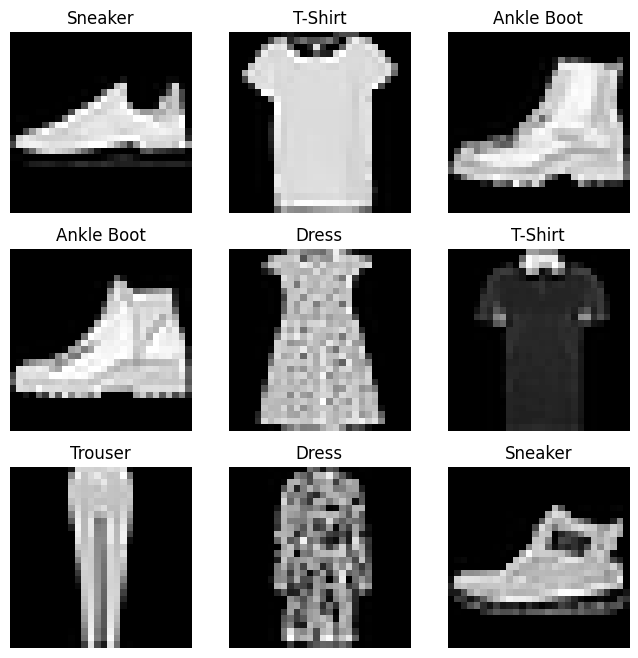

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Definir la red

In [9]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)   # (1,28,28) -> (6,24,24)
        self.conv2 = nn.Conv2d(6, 16, 5)  # (6,12,12) -> (16,8,8)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        c1 = F.relu(self.conv1(input))
        s2 = F.max_pool2d(c1, (2, 2))
        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3, 2)
        s4 = torch.flatten(s4, 1)
        f5 = F.relu(self.fc1(s4))
        f6 = F.relu(self.fc2(f5))
        output = self.fc3(f6)
        return output

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [11]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


## Cargar Data

In [12]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


## Función de perdida y optimizador

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

## Entrenar la red

In [14]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_dataloader, 0):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f"[{epoch+1}, {i+1}] pérdida: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Entrenamiento finalizado")

[1, 100] pérdida: 2.295
[1, 200] pérdida: 1.583
[1, 300] pérdida: 0.895
[1, 400] pérdida: 0.769
[1, 500] pérdida: 0.684
[1, 600] pérdida: 0.609
[1, 700] pérdida: 0.580
[1, 800] pérdida: 0.578
[1, 900] pérdida: 0.547
[2, 100] pérdida: 0.522
[2, 200] pérdida: 0.523
[2, 300] pérdida: 0.476
[2, 400] pérdida: 0.487
[2, 500] pérdida: 0.473
[2, 600] pérdida: 0.462
[2, 700] pérdida: 0.429
[2, 800] pérdida: 0.439
[2, 900] pérdida: 0.429
[3, 100] pérdida: 0.405
[3, 200] pérdida: 0.422
[3, 300] pérdida: 0.405
[3, 400] pérdida: 0.395
[3, 500] pérdida: 0.388
[3, 600] pérdida: 0.375
[3, 700] pérdida: 0.386
[3, 800] pérdida: 0.373
[3, 900] pérdida: 0.380
[4, 100] pérdida: 0.373
[4, 200] pérdida: 0.370
[4, 300] pérdida: 0.357
[4, 400] pérdida: 0.354
[4, 500] pérdida: 0.349
[4, 600] pérdida: 0.344
[4, 700] pérdida: 0.352
[4, 800] pérdida: 0.337
[4, 900] pérdida: 0.334
[5, 100] pérdida: 0.330
[5, 200] pérdida: 0.324
[5, 300] pérdida: 0.327
[5, 400] pérdida: 0.330
[5, 500] pérdida: 0.327
[5, 600] pérdida

In [15]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## Test de la red con el test_data

In [16]:
import torchvision
import torchvision.transforms as transforms

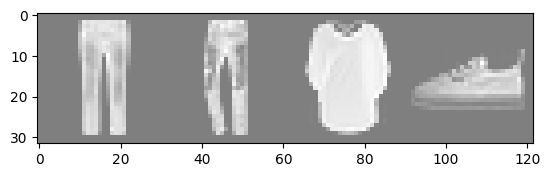

GroundTruth:  Trouser    Trouser    T-shirt    Sneaker   


In [17]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:10s}' for j in range(4)))

In [18]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [19]:
outputs = net(images)

In [20]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  Trouser Trouser Shirt Sneaker


In [21]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Precisión en test set: {100 * correct / total:.2f}%")


Precisión en test set: 87.39%


In [22]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Precisión por clase: {classname:5s} is {accuracy:.1f} %')

Precisión por clase: T-shirt is 81.2 %
Precisión por clase: Trouser is 97.9 %
Precisión por clase: Pullover is 76.6 %
Precisión por clase: Dress is 89.5 %
Precisión por clase: Coat  is 80.2 %
Precisión por clase: Sandal is 92.7 %
Precisión por clase: Shirt is 66.4 %
Precisión por clase: Sneaker is 95.8 %
Precisión por clase: Bag   is 97.9 %
Precisión por clase: Ankle boot is 95.7 %
